In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data.shape

(1025, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
data_dup = data.duplicated().any()

In [8]:
data_dup

True

In [9]:
data = data.drop_duplicates()

In [10]:
data_dup= data.duplicated().any()

In [11]:
data_dup

False

In [12]:
cate_val=[]
cont_val=[]

for column in data.columns:
    if data[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [13]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [14]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [15]:
data['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

In [16]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [17]:
#Encoding.
cate_val.remove('sex')
cate_val.remove('target')
data = pd.get_dummies(data,columns=cate_val,drop_first=True)

In [18]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,1,140,203,155,3.1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,70,1,145,174,125,2.6,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,1,148,203,161,0.0,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,0,138,294,106,1.9,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [19]:
#Feature Scaling.
from sklearn.preprocessing import StandardScaler

In [20]:
st = StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])

In [21]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [22]:
#Spliting the data set into training and testing set
x = data.drop('target',axis=1)

In [23]:
x

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,False,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,False,False,False,True,...,True,False,False,False,False,False,False,False,False,True
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,False,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,False,False,False,True,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,1.503322,0,-0.661712,-0.687083,-1.511859,0.394086,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
733,-1.153610,0,-1.346085,-2.041893,1.112172,-0.382092,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
739,-0.267966,1,-0.205463,0.164513,0.499898,-0.899544,False,False,False,False,...,True,False,True,True,False,False,False,False,False,True
843,0.506972,1,1.619532,0.512893,-1.074521,-0.899544,False,False,True,False,...,False,False,True,False,False,False,False,False,True,False


In [24]:
y = data['target']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [27]:
y_test

245    1
349    0
135    0
389    1
66     1
      ..
402    1
123    1
739    0
274    1
256    1
Name: target, Length: 61, dtype: int64

In [28]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [29]:
#Logistic regression
from sklearn.linear_model import LogisticRegression

In [30]:
log = LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [31]:
y_pred1 = log.predict(x_test)

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
accuracy_score(y_test,y_pred1)

0.7868852459016393

In [34]:
#SVM
from sklearn import svm

In [35]:
svm = svm.SVC()

In [36]:
svm.fit(x_train,y_train)

SVC()

In [37]:
y_pred2 = svm.predict(x_test)

In [38]:
accuracy_score(y_test,y_pred2)

0.8032786885245902

In [39]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

In [40]:
knn = KNeighborsClassifier()

In [41]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [42]:
y_pred3=knn.predict(x_test)

In [43]:
accuracy_score(y_test,y_pred3)

0.7377049180327869

In [44]:
score = []

for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    score.append(accuracy_score(y_test,y_pred))

In [45]:
score

[0.7213114754098361,
 0.8032786885245902,
 0.7049180327868853,
 0.7049180327868853,
 0.7377049180327869,
 0.8032786885245902,
 0.7868852459016393,
 0.8032786885245902,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7540983606557377,
 0.7377049180327869,
 0.7540983606557377,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869]

In [46]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
accuracy_score(y_test,y_pred)

0.8032786885245902

In [47]:
#Non linera ML algorith
data=pd.read_csv('heart.csv')

In [48]:
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [49]:
data=data.drop_duplicates()

In [50]:
data.shape

(302, 14)

In [51]:
x = data.drop('target',axis=1)
y=data['target']

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [53]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier

In [54]:
dt = DecisionTreeClassifier()

In [55]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [56]:
y_pred4= dt.predict(x_test)

In [57]:
accuracy_score(y_test,y_pred4)

0.7213114754098361

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
rf = RandomForestClassifier()

In [60]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [61]:
y_pred5 = rf.predict (x_test)

In [62]:
accuracy=accuracy_score(y_test,y_pred5)

In [63]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,matthews_corrcoef,roc_curve,auc,precision_recall_curve
from sklearn.metrics import confusion_matrix

In [64]:
recall=recall_score(y_test,y_pred5)

In [65]:
precision1=precision_score(y_test,y_pred5)
f11=f1_score(y_test,y_pred5)
mcc=matthews_corrcoef(y_test,y_pred5)

In [66]:
print('Accuracy:',accuracy*100)
print('Recall:',recall*100)
print('Precision:',precision1*100)
print('F1 Score:',f11*100)
print('Matthews Correlation Coefficient:',mcc*100)

Accuracy: 83.60655737704919
Recall: 86.20689655172413
Precision: 80.64516129032258
F1 Score: 83.33333333333334
Matthews Correlation Coefficient: 67.384323215434


C:\Users\SAURAV SINGH RAWAT\AppData\Local\Temp\ipykernel_22380\4000264567.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=scores, y=labels, palette=palette)
C:\Users\SAURAV SINGH RAWAT\AppData\Local\Temp\ipykernel_22380\4000264567.py:7: UserWarning: The palette list has more values (9) than needed (5), which may not be intended.
  sns.barplot(x=scores, y=labels, palette=palette)


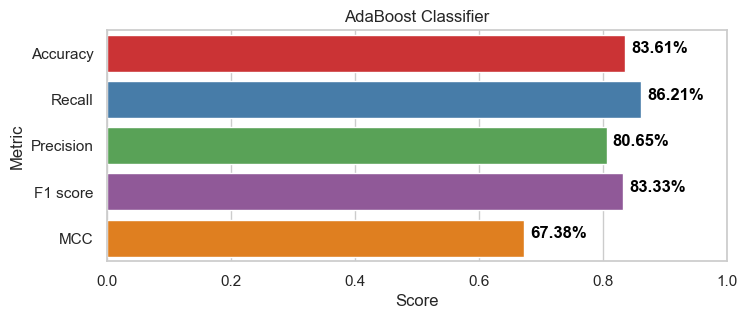

In [67]:
labels = ['Accuracy', 'Recall', 'Precision', 'F1 score','MCC']
scores = [accuracy,recall, precision1,f11,mcc]
sns.set(style='whitegrid')
sns.set_color_codes('pastel')
palette = sns.color_palette('Set1')
fig, ax = plt.subplots(figsize=(8, 3))
sns.barplot(x=scores, y=labels, palette=palette)
ax.set_xlim(0, 1)
ax.set_xlabel('Score')
ax.set_ylabel('Metric')
ax.set_title('AdaBoost Classifier')
for i, v in enumerate(scores):
    ax.text(v+0.01, i, f'{v*100:.2f}%', color='black', fontweight='bold')
plt.show()

In [68]:
cm=confusion_matrix(y_test,y_pred5)

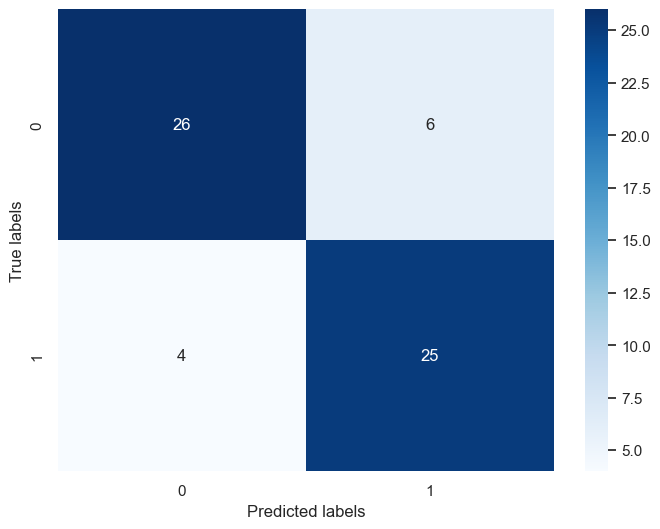

In [69]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g',
xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [70]:
from sklearn.ensemble import GradientBoostingClassifier

In [71]:
gbc = GradientBoostingClassifier() 

In [72]:
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [73]:
y_pred6= gbc.predict(x_test)

In [74]:
accuracy_score(y_test,y_pred6)

0.8032786885245902

In [75]:
final_data = pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','GB'],'ACC':[accuracy_score(y_test,y_pred1),accuracy_score(y_test,y_pred2),accuracy_score(y_test,y_pred3),accuracy_score(y_test,y_pred4),accuracy_score(y_test,y_pred5),accuracy_score(y_test,y_pred6)]})

In [76]:
final_data

,Models,ACC
0,LR,0.786885
1,SVM,0.803279
2,KNN,0.737705
3,DT,0.721311
4,RF,0.836066
5,GB,0.803279


In [77]:
import pandas as pd

In [78]:
import seaborn as sns

In [79]:
df = pd.DataFrame(final_data)

<Axes: xlabel='Models', ylabel='ACC'>

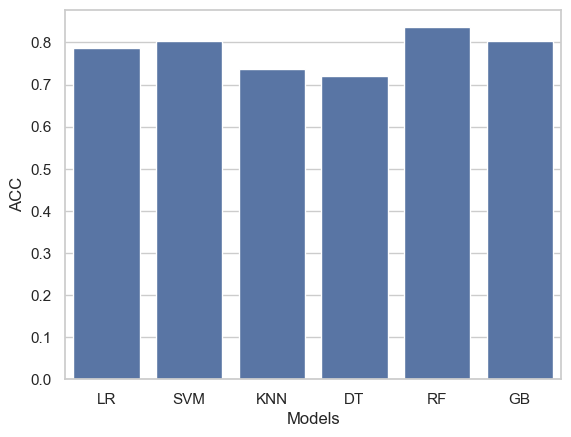

In [80]:
sns.barplot(x='Models',y='ACC',data=df)

In [81]:
x=data.drop('target',axis=1)
y=data['target']

In [82]:
x.shape

(302, 13)

In [83]:
y.shape

(302,)

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
#enitre data set
rf = RandomForestClassifier()
rf.fit(x,y)

RandomForestClassifier()

In [86]:
import pandas as pd

In [87]:
new_data = pd.DataFrame({
    'age':52,
    'sex':1,
    'cp':0,
'trestbps':125,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'oldpeak':1.0,
    'slope':2,
    'ca':3,
    'thal':3,
}, index=[0])

In [88]:
new_data.shape

(1, 13)

In [89]:
p=rf.predict(new_data)
if p[0]==0:
    print("No Heart Disease")
else:
    print("Posibility of Heart Disease")


No Heart Disease


In [90]:
new_data1 = pd.DataFrame({
    'age':67,
    'sex':0,
    'cp':0,
'trestbps':106,
    'chol':223,
    'fbs':0,
    'restecg':1,
    'thalach':142,
    'exang':0,
    'oldpeak':0.3,
    'slope':2,
    'ca':2,
    'thal':2,
}, index=[0])

In [91]:
p=rf.predict(new_data1)
if p[0]==0:
    print("No Heart Disease")
else:
    print("Posibility of Heart Disease")


Posibility of Heart Disease
